viết vào một hình ảnh và cho máy nhìn nhận, hình ảnh đầu tiên là hình ảnh màu

In [4]:
!pip install pillow matplotlib
!pip install opencv-python

^C


In [38]:

from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import numpy as np
import cv2

thực hiện bài 2a, biển đổi ảnh thành dạng âm bản

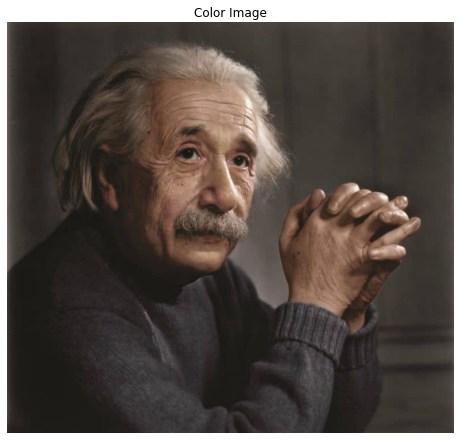

In [7]:
#load hình ảnhh
color_image_path = './albert-einstein.jpg'
color_image = Image.open(color_image_path)

# Display the color image
plt.figure(figsize=(8, 8))
plt.imshow(color_image)
plt.title('Color Image')
plt.axis('off')
plt.show()


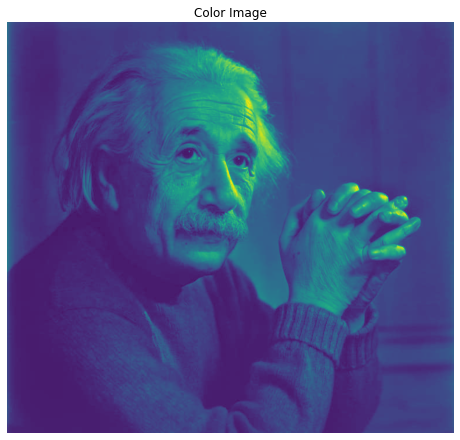

In [10]:
# Load the image
color_image_path = './path_to_save_black_and_white_image.jpg'
color_image = Image.open(color_image_path)

# Display the color image
plt.figure(figsize=(8, 8))
plt.imshow(color_image)
plt.title('Color Image')
plt.axis('off')
plt.show()


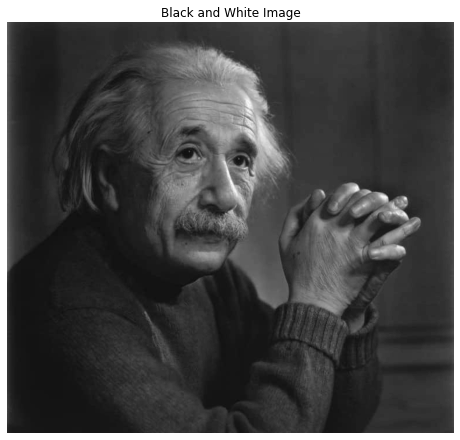

In [13]:
# Convert the image to grayscale
bw_image = color_image.convert('L')

# Display the black and white image
plt.figure(figsize=(8, 8))
plt.imshow(bw_image, cmap='gray')
plt.title('Black and White Image')
plt.axis('off')
plt.show()


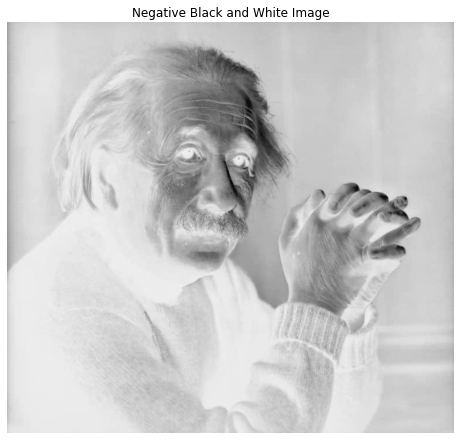

In [16]:
# Apply negative transformation
negative_bw_image = ImageOps.invert(bw_image)

# Display the negative black and white image
plt.figure(figsize=(8, 8))
plt.imshow(negative_bw_image, cmap='gray')
plt.title('Negative Black and White Image')
plt.axis('off')
plt.show()


In [27]:
# Save the negative black and white image
negative_bw_image_path = 'negative_image.jpg'
negative_bw_image.save(negative_bw_image_path)

print(f"Negative black and white image saved to {negative_bw_image_path}")


Negative black and white image saved to negative_image.jpg


Thực hiện bài 2 b. biến đổi ảnh logaric

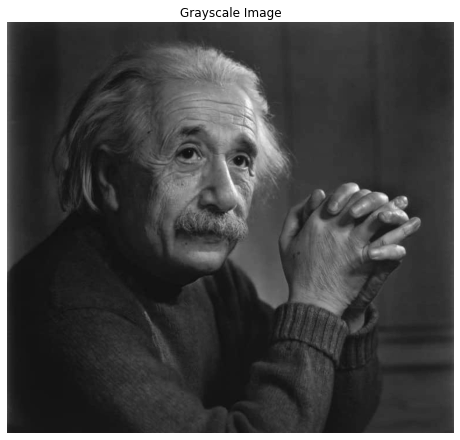

In [20]:
# Convert the image to grayscale
gray_image = color_image.convert('L')

# Display the grayscale image
plt.figure(figsize=(8, 8))
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()


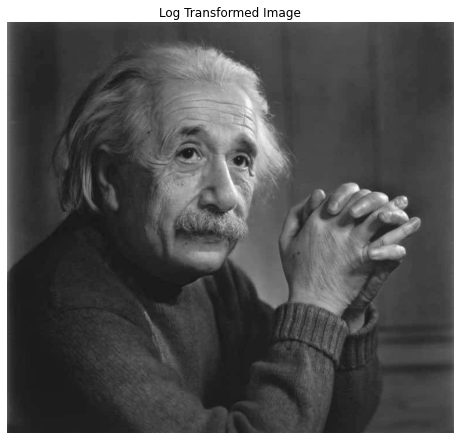

In [29]:
# Convert the grayscale image to a NumPy array
gray_array = np.array(gray_image)

# Normalize the pixel values to the range [0, 1]
normalized_array = gray_array / 255.0

# Apply the log transformation
c = 1  # Scaling constant
log_transformed_array = c * np.log(1 + normalized_array)

# Scale back to the range [0, 255]
log_transformed_array = (log_transformed_array * 255).astype(np.uint8)

# Convert the result back to an image
log_transformed_image = Image.fromarray(log_transformed_array)

# Display the log-transformed image
plt.figure(figsize=(8, 8))
plt.imshow(log_transformed_image, cmap='gray')
plt.title('Log Transformed Image')
plt.axis('off')
plt.show()


Change the Pixel values range 

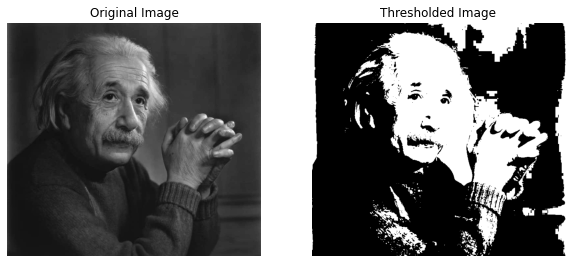

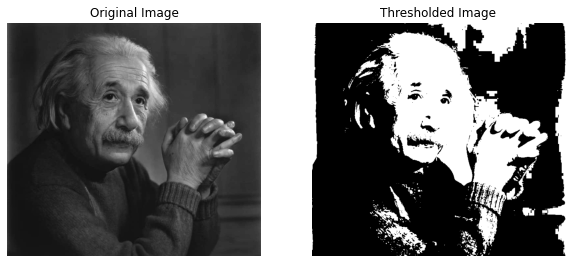

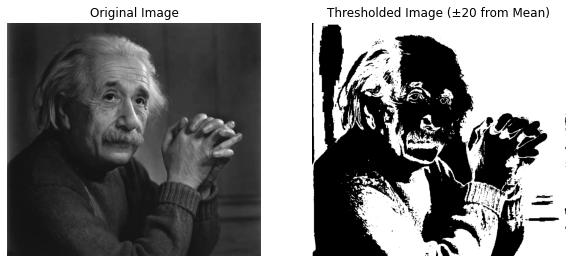

In [48]:

image = cv2.imread('./bw-image.jpg', cv2.IMREAD_GRAYSCALE)


mean_value = np.mean(image)

# Apply the threshold: pixels below the mean become 0, above the mean become 255
_, thresholded_image = cv2.threshold(image, mean_value, 255, cv2.THRESH_BINARY)

# Apply the threshold: pixels above the mean become 0, below the mean become 255
_, thresholded_image_inv = cv2.threshold(image, mean_value, 255, cv2.THRESH_BINARY_INV)


mask = np.abs(image - mean_value) <= 20
output_image = np.zeros_like(image)
output_image[mask] = 255


# Plot the original and thresholded images for comparison
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(thresholded_image, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')

plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(thresholded_image_inv, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')

plt.show()

# Plot the original and thresholded images for comparison
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(output_image, cmap='gray')
plt.title('Thresholded Image (±20 from Mean)')
plt.axis('off')

plt.show()

Bài 3. : Áp dụng phép biến đổi Luật lũy thừa cho các giá trị γ sau (0,2, 0,5, 1,2 và 1,8). Đảm bảo điều chỉnh các kiểu dữ liệu cho phù hợp.


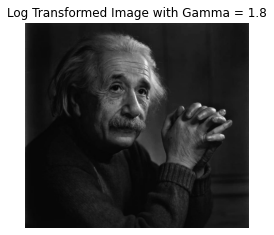

In [53]:
# Convert the grayscale image to a NumPy array
gray_array = np.array(gray_image)

# Normalize the pixel values to the range [0, 1]
normalized_array = gray_array / 255.0

# Define gamma parameter
gamma = 1.8

# Apply the log transformation with gamma correction
c = 255.0 / (np.log(1 + 1.0) ** gamma)  # Scaling constant based on the max pixel value
log_transformed_array = c * (np.log(1 + normalized_array) ** gamma)

# Clip values to be in the valid range [0, 255] and convert to uint8
log_transformed_array = np.clip(log_transformed_array, 0, 255).astype(np.uint8)

# Convert the result back to an image
log_transformed_image = Image.fromarray(log_transformed_array)

# Display the log-transformed image
plt.figure(figsize=(4, 4))
plt.imshow(log_transformed_image, cmap='gray')
plt.title('Log Transformed Image with Gamma = 1.8')
plt.axis('off')
plt.show()


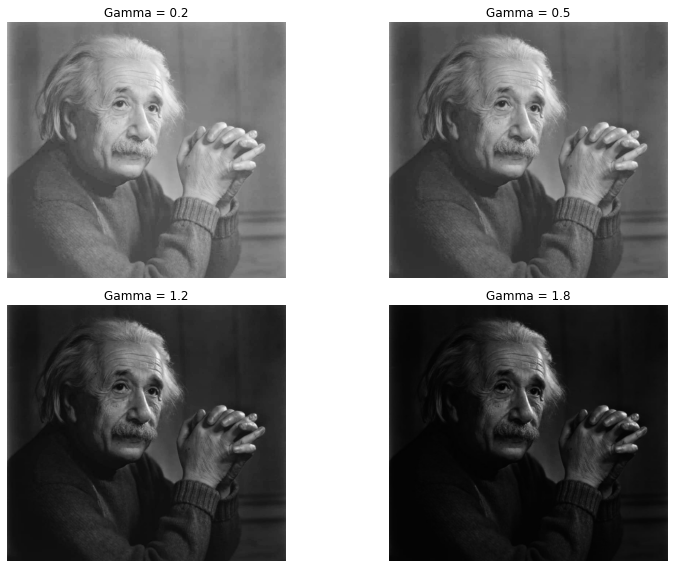

In [49]:

# Normalize the pixel values to the range [0, 1]
image_normalized = image / 255.0

# List of gamma values
gamma_values = [0.2, 0.5, 1.2, 1.8]

# Create a figure for plotting
plt.figure(figsize=(12, 8))

# Apply Power Law (Gamma) transformation for each gamma value
for i, gamma in enumerate(gamma_values):
    # Apply the Power Law transformation
    transformed_image = np.power(image_normalized, gamma)
    
    # Scale back to [0, 255] and convert to uint8
    transformed_image = np.uint8(transformed_image * 255)
    
    # Plot the result
    plt.subplot(2, 2, i + 1)
    plt.imshow(transformed_image, cmap='gray')
    plt.title(f'Gamma = {gamma}')
    plt.axis('off')

# Show the plots
plt.tight_layout()
plt.show()


câu 4: Áp dụng cắt mức độ xám bằng cách sử dụng giới hạn dưới 100 và giới hạn trên 200. Đặt tất cả các giá trị này thành 210.


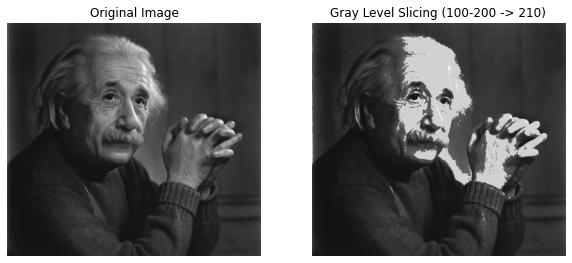

In [54]:

# Define the lower and upper limits for gray level slicing
lower_limit = 100
upper_limit = 200
new_value = 210

# Create a copy of the original image to apply slicing
sliced_image = image.copy()

# Apply gray level slicing: set values between lower and upper limits to 210
sliced_image[(image >= lower_limit) & (image <= upper_limit)] = new_value

# Plot the original and gray level sliced images for comparison
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sliced_image, cmap='gray')
plt.title(f'Gray Level Slicing (100-200 -> {new_value})')
plt.axis('off')

plt.show()